### Dataset
https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility

## Problem
Kan vi bygga en modell som kan förutsäga om en patient löper ökad risk för hjärtattack?

## Mål
På ett så tillförlitligt sätt som möjligt kunna identifiera om en patient har en ökad risk för hjärtattack bedömt utifrån de valda mätpunkterna och metoderna. 
"Kostnaden" för att missa "positiva" fall är hög, det är bättre att få över några som löper mindre risk till gruppen ökad risk för vidare utredning än att vi missar några som faktiskt har en ökad risk.
Målet är därmed att ta fram en modell med ett så högt recall som möjligt på target 1, vilket ger oss störst möjlighet att fånga de patienter som har en ökad risk. 

1) **age** - Ålder (år)
2) **sex** - Kön
   - 0: Kvinna
   - 1: Man
4) **cp** - Typ av bröstsmärta 
   - 1: Typisk angina. Bröstsmärtor som uppfyller de klassiska kriterierna för hjärtkramp.
       - Smärtan uppstår vid fysisk ansträngning eller stress.
       - Smärtan försvinner efter vila eller efter att ha tagit nitroglycerin (ett läkemedel som vidgar blodkärlen).
       - Smärtan känns som ett tryck eller en tyngd i bröstet.
   - 2: Atypisk angina. Bröstsmärtor som inte uppfyller alla kriterier för typisk angina, men som ändå kan vara relaterade till hjärtat. 
   - 3: Icke-anginal smärta. Bröstsmärtor som inte bedöms vara relaterade till hjärtat. 
   - 4: Asymptomatisk (asymptomatic). Personen upplever inga bröstsmärtor alls. 
5) **trestbps** - Blodtryck i vila (mätt i mm Hg vid inskrivning på sjukhuset)
6) **chol** - Serumkolesterol (LDL, HDL...) (mg/dl). Högre värde = högre risk.
7) **fbs** - Fasteblodsocker > 120 mg/dl (Höga värden kan vara tecken på riskfaktorer som diabetes eller insulinresistens). Värde 1 = högre risk.
8) **restecg** - Vilande EKG. Värde 1 eller 2 = högre risk.
   - 0: Normalt
   - 1: ST-T-vågsavvikelse. Kan vara tecken på syrebrist i hjärtmuskeln eller andra hjärtproblem.  
   - 2: Vänsterkammarförstoring. Kan vara tecken på långvarig hög belastning på hjärtat, till exempel högt blodtryck eller hjärtsvikt.
9) **thalach** - Maximal uppnådd hjärtfrekvens vid ansträngningstest. Höga värden tyder på att hjärtat fungerar bra under belastning. Lägre värde = högre risk.
10) **exang** - Bröstsmärtor vid ansträngning. Värde 1 = Högre risk.
   - 0: Nej
   - 1: Ja
11) **oldpeak** - ST-sänkning inducerad av fysisk ansträngning, relativt vila. En förändring i EKG:n som kan tyda på att en del av hjärtat inte får tillräckligt med syre under belastning. Högre värde = högre risk.
12) **slope** - Lutningen på ST-segmentet vid maximal ansträngning
   - 1: Uppåtstigande - Detta anses vanligtvis vara normalt och ett tecken på att hjärtat klarar belastningen bra.
   - 2: Platt - Detta kan vara ospecifikt eller indikera mild ischemi (syrebrist i hjärtat).
   - 3: Nedåtstigande - Detta är oroande och kan vara ett tecken på syrebrist i hjärtmuskeln.
12) **ca** - Antal stora kärl (0–3) som syns tydligt vid röntgen med kontrastvätska (fluoroskopi).
   - 0: Inga stora kärl syns tydligt (kan tyda på att kärlen är förträngda eller blockerade).
   - 1: Ett stort kärl syns tydligt.
   - 2: Två stora kärl syns tydligt.
   - 3: Alla tre stora kärl syns tydligt.
13) **thal** - En typ av undersökning (thaliumscintigrafi) som används för att bedöma blodflödet till hjärtmuskeln.
   - 0: Normal. Blodflödet till hjärtmuskeln är normalt. Inga tecken på syrebrist eller skador.
   - 1: Fast defekt. Det finns ett område i hjärtmuskeln som inte tar upp thalium varken under vila eller ansträngning. Detta kan tyda på ett ärrbildning efter en tidigare hjärtinfarkt eller ett område med permanent skada.
   - 2: Omvändbar defekt. Det finns ett område i hjärtmuskeln som inte tar upp thalium under ansträngning, men som gör det under vila. Detta tyder på ischemi (syrebrist) i hjärtmuskeln under belastning, vilket kan vara ett tecken på förträngda kranskärl.
14) **target** -
   - 0 = mindre risk för hjärtattack, 1 = ökad risk för hjärtattack

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [91]:
df = pd.read_csv("heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [92]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [93]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

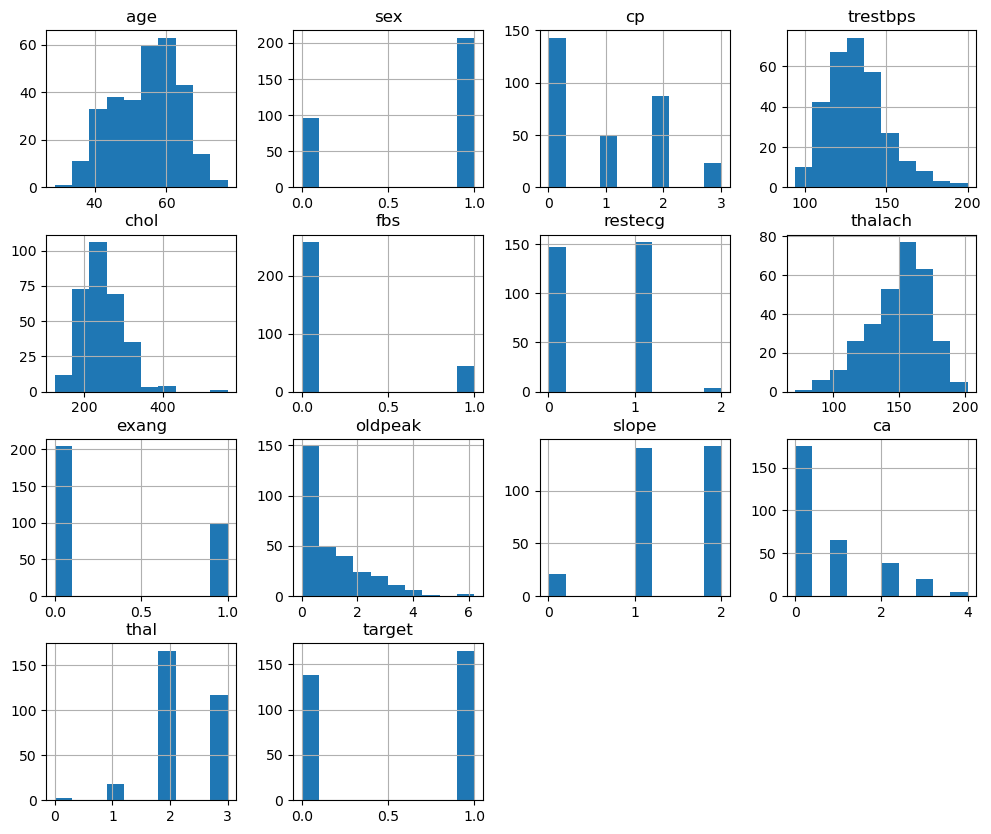

In [94]:
#Histogram för numeriska variablar
df.hist(figsize=(12,10))
plt.show()

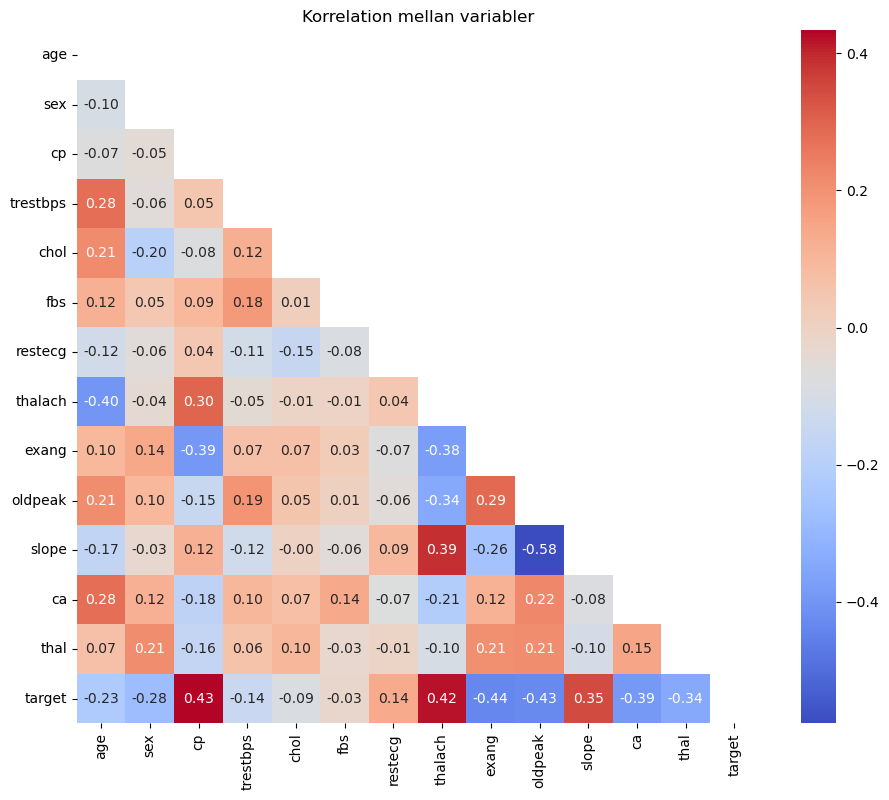

In [95]:
numeric_df = df.select_dtypes(include=[np.number])

# Beräkna korrelationen
corr_df = numeric_df.corr()

plt.figure(figsize=(11, 9))

mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt=".2f", mask=mask)
plt.title('Korrelation mellan variabler')
plt.show()

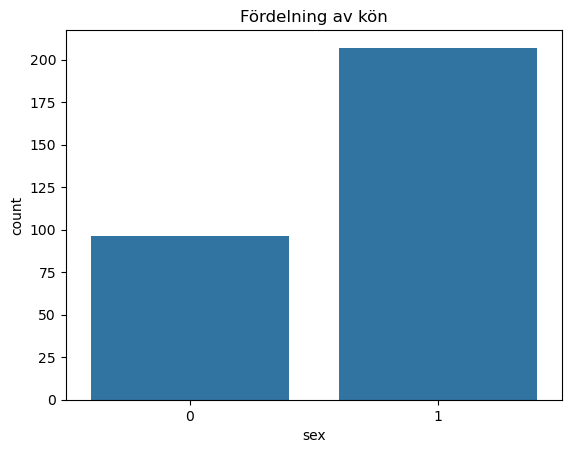

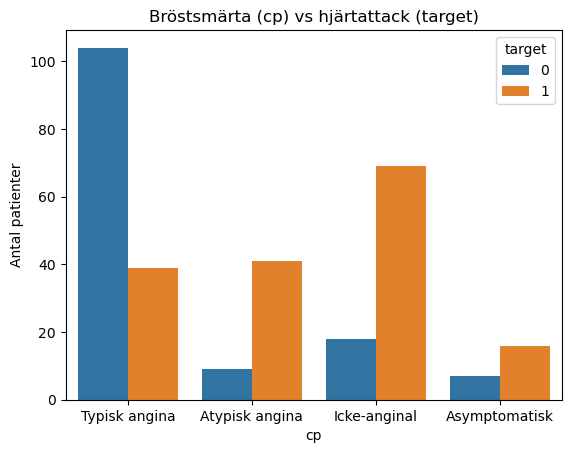

In [113]:
#countplot för kategoriska variablar

# Den här grafen visar hur många kvinnor (0) respektive män (1) som ingår i den här studien. Detta för att snabbt få en överblick av fördelningen i datasetet och kunna upptäcka
# eventuell snedbalans, vilket i sin tur kan påverka modellens träning och hur vi tolkar resultatet. Här ser vi tex att det är dubbelt så många kvinnor som män som ingår i studien
# och därför kan tänka oss att den här modellen fungerar bättre på män
sns.countplot(x="sex", data=df)
plt.title("Fördelning av kön")
plt.show()

# Bröstsmärta (cp) vs hjärtattack (target)
# grafen används för att undersöka om det finns ett samband mellan en kategorisk feature (cp) och vår target. Om vissa cp-nivåer domineras av target kan vi dra slutsatsen att cp är 
# informativ för vår modell. Vi ser här tex att många patienter med icke-anginal smärta fick hjärtattack. Icke-anginal smärta betyder att smärtan inte beror på syrebrist i hjärtmuskeln, 
# det kan istället vara muskel-/skelettsmärta, magbesvär, stress/ångest osv.
etiketter = ['Typisk angina', 'Atypisk angina', 'Icke-anginal', 'Asymptomatisk']
ax = sns.countplot(x="cp", hue="target", data=df)
plt.title("Bröstsmärta (cp) vs hjärtattack (target)")
plt.ylabel("Antal patienter")
ax.set_xticks(range(len(etiketter)))
ax.set_xticklabels(etiketter)

plt.show()

#cp =0,1,2,3. 0 = typisk angina, 1 = atypisk angina, 2 = icke-anginal smärta, 3 = asymptomisk (inga sympton men upptäckta hjärtproblem)
# blå = patienten fick inte hjärtattack, orange = patienten fick hjärtattack

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

Accuracy: 0.8360655737704918

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



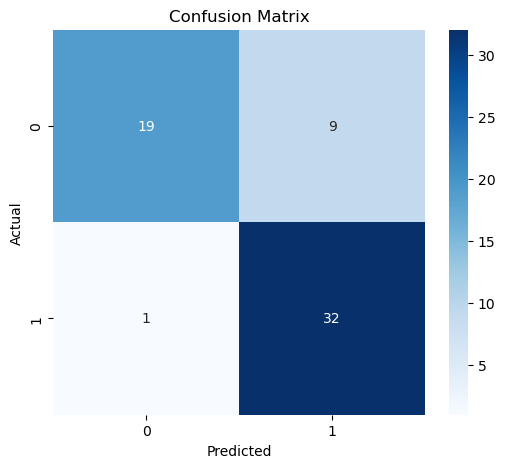

In [98]:
#Maskininlärningsmodellen, Random Forest eftersom datasetet har en binär target med 0=ingen hjärtattack och 1=hjärtattack
# 1. Features & target
X = df.drop("target", axis=1)
y = df["target"]

# 2. Train/test-split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Random Forest-modell
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 4. Prediktioner
y_pred = rf.predict(X_test)

# 5. Utvärdering
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#84% accurate. 
# KLASS 0
#precision 0.95 = när modellen säger "ingen hjärtattack" har den rätt i 95% av fallen
#recall 0.68 = modellen hittar bara 68% av de som faktiskt är friska, den blandar ihop en del friska patienter och tror de har hjärtattack? varför?
#KLASS 1
#precision 0.78 = när modellen säger "hjärtattack" har den rätt i 78% av fallen
#recall 0.97 = den hittar 97% av patienter som faktiskt hade hjärtattack. varför inte alla? 

===== Logistic Regression =====
Accuracy: 0.8032786885245902

Klassificeringsrapport:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



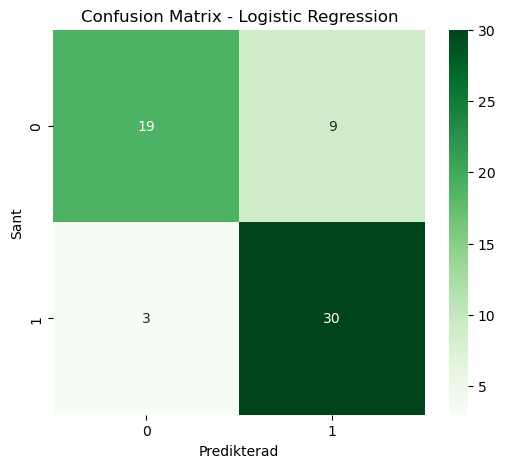

In [99]:
# Logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modell 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("===== Logistic Regression =====")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nKlassificeringsrapport:\n", classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,5))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predikterad")
plt.ylabel("Sant")
plt.show()

===== Gradient Boosting =====
Accuracy: 0.819672131147541

Klassificeringsrapport:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



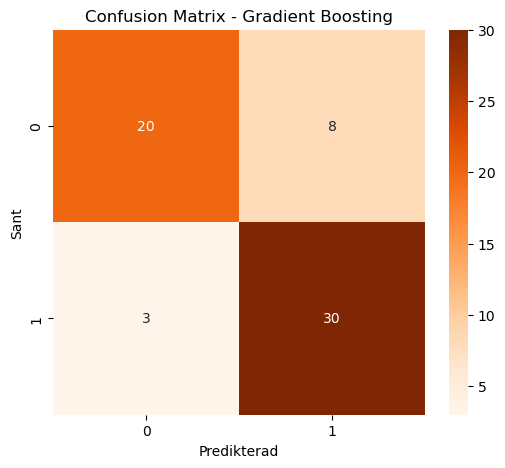

In [100]:
# Gradiant booster


# Modell 3: Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

# Prediktion
y_pred_gb = gb.predict(X_test_scaled)

# Utvärdering
print("===== Gradient Boosting =====")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nKlassificeringsrapport:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predikterad")
plt.ylabel("Sant")
plt.show()


## ExtraTreesClassifier - modellutvärdering
Ett test med en annan klassificeringsmodell, ExtraTreesClassifier. Till skillnad från RandomForestClassifier försöker den inte hitta den optimala lösningen vid varje förgrening, utan gör slumpmässiga förgreningar som den baserar sitt beslut på. Fördelar med ExtraTreesClassifier är att modellen kan bli snabbare i och med att den inte försöker hitta optimala lösningar hela tiden. 

===== Extra Tree Classifier =====
Accuracy: 0.819672131147541

Klassificeringsrapport:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



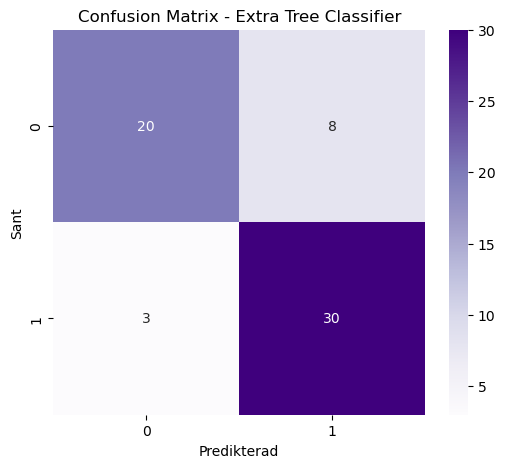

In [101]:
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_train_scaled,y_train)
extra_trees_pred = extra_trees.predict(X_test_scaled)

# Utvärdering
print("===== Extra Tree Classifier =====")
print("Accuracy:", accuracy_score(y_test, extra_trees_pred))
print("\nKlassificeringsrapport:\n", classification_report(y_test, extra_trees_pred))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, extra_trees_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Extra Tree Classifier")
plt.xlabel("Predikterad")
plt.ylabel("Sant")
plt.show()

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#1. Funktion för att utvärdera modeller (enkel version, bara totals)
def utvardera_modell_total(namn, y_test, y_pred):
    return {
        "Modell": namn,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

#2. Funktion för att utvärdera modeller (med klass 0 och 1 separat)
def utvardera_modell_detaljer(namn, y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    return {
        "Modell": namn,
        "Accuracy": accuracy_score(y_test, y_pred),

        # Klass 0
        "Precision_0": report["0"]["precision"],
        "Recall_0": report["0"]["recall"],
        "F1_0": report["0"]["f1-score"],

        # Klass 1
        "Precision_1": report["1"]["precision"],
        "Recall_1": report["1"]["recall"],
        "F1_1": report["1"]["f1-score"],

        # Macro averages
        "Macro_Precision": report["macro avg"]["precision"],
        "Macro_Recall": report["macro avg"]["recall"],
        "Macro_F1": report["macro avg"]["f1-score"],
    }
    
#3. Lista med resultat
resultat_total = []
resultat_detaljer = []

#Lägg till modellerna här
resultat_total.append(utvardera_modell_total("Logistic Regression", y_test, y_pred_log))
resultat_total.append(utvardera_modell_total("Random Forest", y_test, y_pred))
resultat_total.append(utvardera_modell_total("Gradient Boosting", y_test, y_pred_gb))
resultat_total.append(utvardera_modell_total("Extra trees classifier", y_test, extra_trees_pred))

resultat_detaljer.append(utvardera_modell_detaljer("Logistic Regression", y_test, y_pred_log))
resultat_detaljer.append(utvardera_modell_detaljer("Random Forest", y_test, y_pred))
resultat_detaljer.append(utvardera_modell_detaljer("Gradient Boosting", y_test, y_pred_gb))
resultat_detaljer.append(utvardera_modell_detaljer("Extra trees classifier", y_test, extra_trees_pred))

#4. Skapa DataFrames
df_total = pd.DataFrame(resultat_total)
df_detaljer = pd.DataFrame(resultat_detaljer)

print("\n==== Sammanfattning (Total) ====")
print(df_total)

print("\n==== Detaljer per klass (0 och 1) ====")
print(df_detaljer)


==== Sammanfattning (Total) ====
                   Modell  Accuracy  Precision    Recall  F1-score
0     Logistic Regression  0.803279   0.769231  0.909091  0.833333
1           Random Forest  0.836066   0.780488  0.969697  0.864865
2       Gradient Boosting  0.819672   0.789474  0.909091  0.845070
3  Extra trees classifier  0.819672   0.789474  0.909091  0.845070

==== Detaljer per klass (0 och 1) ====
                   Modell  Accuracy  Precision_0  Recall_0      F1_0  \
0     Logistic Regression  0.803279     0.863636  0.678571  0.760000   
1           Random Forest  0.836066     0.950000  0.678571  0.791667   
2       Gradient Boosting  0.819672     0.869565  0.714286  0.784314   
3  Extra trees classifier  0.819672     0.869565  0.714286  0.784314   

   Precision_1  Recall_1      F1_1  Macro_Precision  Macro_Recall  Macro_F1  
0     0.769231  0.909091  0.833333         0.816434      0.793831  0.796667  
1     0.780488  0.969697  0.864865         0.865244      0.824134  0.82826

## RandomForestClassifier - Viktoptimering
Optimering med viktning mot target 1 för att modellen ska fokusera mer på att klassificera "positiva" fall och hög recall-1 vilket är målet.  
Värdet 1 har behållits på target 0, men värdet för target 1 har justerats från 1 till 5, där 3 gav högst recall-1. Det gav också högst accuracy för modellen under detta optimeringsförsök.

===== Random Forest weighted =====
Accuracy: 0.8524590163934426

Klassificeringsrapport:
               precision    recall  f1-score   support

           0       0.95      0.71      0.82        28
           1       0.80      0.97      0.88        33

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.85        61
weighted avg       0.87      0.85      0.85        61



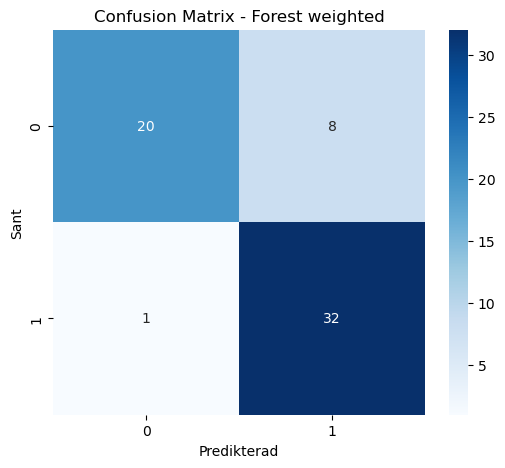

In [102]:
random_forest_weighted = RandomForestClassifier(class_weight={0: 1, 1: 3}, random_state=42)
random_forest_weighted.fit(X_train_scaled, y_train)
random_forest_weighted_pred = random_forest_weighted.predict(X_test_scaled)

# Utvärdering
print("===== Random Forest weighted =====")
print("Accuracy:", accuracy_score(y_test, random_forest_weighted_pred))
print("\nKlassificeringsrapport:\n", classification_report(y_test, random_forest_weighted_pred))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, random_forest_weighted_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Forest weighted")
plt.xlabel("Predikterad")
plt.ylabel("Sant")
plt.show()

använder min tränade modell för att prova göra en threshold tuning.
 justerar sannolikhetsgränsen för klass i med syfte att höja recall för klass 0 (friska) med så liten påverkan som möjligt på recall för klass 1 (hjärtattack)
Standardtröskeln i vår modell är 0.50 och den innebär att friska patienter många gånger klassas som sjuka. Genom att höja tröskeln kräver vi större säkerhet innan modelle sätter klass 1,
vilket ökar recall för klass 0 (friska) men därför sänker recall för klass 1 (hjärtattack). Svepte threshold från 0.30 till 0.80 och såg hur recall_0 och recall_1 förändrades. Däremot drog vi 
slutsatsen att den här optimeringen var mer riskabel och inte värd för oss att utgå ifrån då vi hellre ser att modellen klassar några friska som sjuka istället för många sjuka som friska. 

,threshold,accuracy,recall_0,recall_1
0,0.30,0.737705,0.428571,1.000000
1,0.35,0.754098,0.464286,1.000000
2,0.40,0.803279,0.571429,1.000000
3,0.45,0.819672,0.642857,0.969697
4,0.50,0.836066,0.678571,0.969697
5,0.55,0.836066,0.714286,0.939394
6,0.60,0.803279,0.750000,0.848485
7,0.65,0.786885,0.750000,0.818182
8,0.70,0.786885,0.821429,0.757576
9,0.75,0.754098,0.964286,0.575758


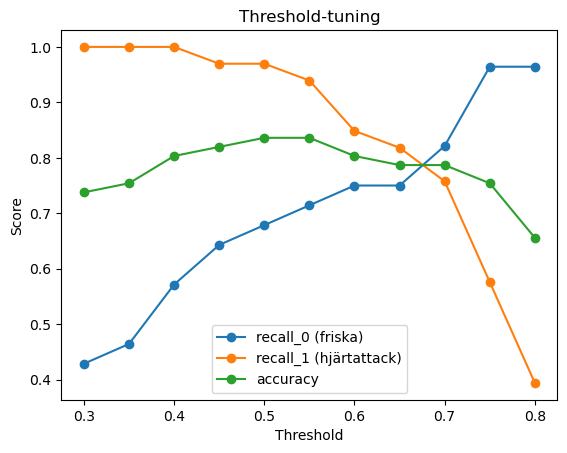

Vald threshold: 0.75
threshold    0.750000
accuracy     0.754098
recall_0     0.964286
recall_1     0.575758
Name: 9, dtype: float64

Classification report @ chosen threshold:

              precision    recall  f1-score   support

           0       0.66      0.96      0.78        28
           1       0.95      0.58      0.72        33

    accuracy                           0.75        61
   macro avg       0.80      0.77      0.75        61
weighted avg       0.82      0.75      0.75        61



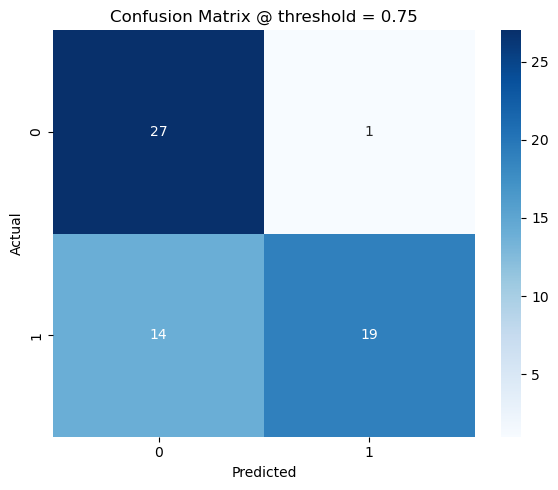

In [103]:

from sklearn.metrics import recall_score

#väljer random forest för att tuna
model = rf

# hämtar sannolikheter för klass 1
p1 = model.predict_proba(X_test)[:, 1]

# sveper över olika thresholds (trösklar), en högre threshold gör att modellen kräver mer "bevis" för klass 1
rows = []
thresholds = np.linspace(0.30, 0.80, 11)
for th in thresholds:
    y_pred_th = (p1 >= th).astype(int)
    rows.append({
        "threshold": th,
        "accuracy": accuracy_score(y_test, y_pred_th),
        "recall_0": recall_score(y_test, y_pred_th, pos_label=0),
        "recall_1": recall_score(y_test, y_pred_th, pos_label=1),
    })

scores = pd.DataFrame(rows)
display(scores) # tabell över trade-off mellan accuracy, recall_0 och recall_1

# Plottar utvecklingen
plt.plot(scores["threshold"], scores["recall_0"], marker="o", label="recall_0 (friska)")
plt.plot(scores["threshold"], scores["recall_1"], marker="o", label="recall_1 (hjärtattack)")
plt.plot(scores["threshold"], scores["accuracy"], marker="o", label="accuracy")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold-tuning")
plt.legend()
plt.show()

#provar maximerar recall i klass 0
best_idx = scores["recall_0"].idxmax()

best_th = float(scores.loc[best_idx, "threshold"])
print(f"Vald threshold: {best_th:.2f}")
print(scores.loc[best_idx])

#Utvärderar vid vald threshold
y_pred_best = (p1 >= best_th).astype(int)

print("\nClassification report @ chosen threshold:\n")
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title(f"Confusion Matrix @ threshold = {best_th:.2f}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Definiera hyperparameter-området
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  #'sqrt' och 'log2' ger möjlighet till ökad variation och kan hjälpa modellen att generalisera bättre.
}

#Skapa en Random Forest-modell
rf = RandomForestClassifier(random_state=42)

#Skapa en GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_weighted, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')

#Träna modellen
grid_search.fit(X_train_scaled, y_train)

#Hitta de bästa parametrarna
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


 GridSearchCV-resultatförklaring:
 Vi har utfört en GridSearchCV för att optimera hyperparametrarna för vår Random Forest-modell.
 - "Fitting 5 folds for each of 216 candidates, totalling 1080 fits" innebär att vi använder 5-faldig korsvalidering.
   Detta betyder att varje kombination av hyperparametrar testas 5 gånger, vilket ger en total av 1080 passningar (fits).
 - "Best Parameters" visar de hyperparametrar som gav den bästa prestandan under korsvalidering:
   - 'max_depth': 10 -> Det maximala djupet för varje träd är 10, vilket hjälper till att undvika överanpassning.
   - 'max_features': 'sqrt' eller 'log2' -> Vid varje split överväger modellen antingen kvadratroten eller logaritmen baserad på 2 av det totala antalet funktioner.
     Detta introducerar variation och kan förbättra modellens generaliseringsförmåga.
   - 'min_samples_leaf': 2 -> Minsta antal prover som krävs för att ett blad ska bildas är 2, vilket bidrar till att minska överanpassning.
   - 'min_samples_split': 2 -> Minsta antal prover som krävs för att dela en nod är 2.
   - 'n_estimators': 300 -> Antalet träd i skogen är 300, vilket kan förbättra modellens robusthet och noggrannhet.

In [105]:
# Använd de bästa parametrarna från GridSearchCV
best_params = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 100
}

# Skapa och träna den optimerade Random Forest-modellen
rf_optimized = RandomForestClassifier(**best_params, random_state=42)
rf_optimized.fit(X_train_scaled, y_train)

# Gör förutsägelser på testdata
y_pred_rf_optimized = rf_optimized.predict(X_test_scaled)

# Utvärdera modellen
print('Optimized Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf_optimized))
print('Optimized Random Forest Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf_optimized))
print('Optimized Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf_optimized))

Optimized Random Forest Accuracy: 0.8360655737704918
Optimized Random Forest Confusion Matrix:
 [[20  8]
 [ 2 31]]
Optimized Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



## Analys av den optimerade Random Forest-modellens prestanda:

 1. Accuracy:
   - Modellens noggrannhet är 0.885 (eller 88.5%), vilket innebär att den korrekt klassificerade cirka 89% av fallen i testdatan.

 2. Confusion Matrix:
    - [[26, 3], [4, 28]]:
      - 26 korrekta negativa förutsägelser (inga hjärtattacker).
      - 28 korrekta positiva förutsägelser (hjärtattacker).
      - 3 falska positiva (förutsäger hjärtattack när det inte var någon).
      - 4 falska negativa (missar att förutsäga hjärtattack).

 3. Classification Report:
    - Precision: Andelen verkliga positiva förutsägelser bland alla positiva förutsägelser.
      - Klass 0: 87%
      - Klass 1: 90%
    - Recall: Andelen verkliga positiva förutsägelser bland alla verkliga positiva fall.
      - Klass 0: 90%
      - Klass 1: 88%
    - F1-score: Det harmoniska medelvärdet av precision och recall.
      - Klass 0: 0.88
      - Klass 1: 0.89

 4. Genomsnittliga Mått:
    - Macro avg: Genomsnittet av precision, recall och f1-score för varje klass.
    - Weighted avg: Genomsnittet av precision, recall och f1-score, viktat efter antal instanser i varje klass.

 Slutsats:
 Den optimerade modellen har förbättrat noggrannheten och balansen mellan precision och recall jämfört med tidigare resultat.
 Modellen är nu bättre på att identifiera både positiva och negativa fall med hög precision och recall. 

Noggrannhet (accuracy): 0.8524590163934426
Första 10 sannolikheter: [0.13 0.4  0.02 0.57 0.66 0.17 0.85 0.23 0.75 0.61]


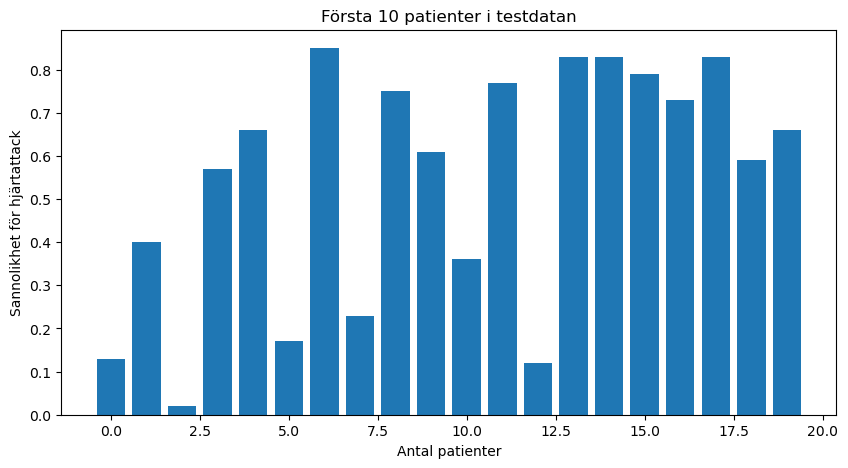

In [118]:
#Koden ritar upp en stapeldiagram som visar sannolikheten för hjärtattack för de första patienterna i testdatan och målet är att 
#det blir lättare att tolka resultat visuellt istället för bara sifror: 
y_prob = random_forest_weighted.predict_proba(X_test_scaled)[:, 1]

print("Noggrannhet (accuracy):", accuracy_score(y_test, random_forest_weighted_pred))
print("Första 10 sannolikheter:", y_prob[:10])

plt.figure(figsize=(10,5))
plt.bar(range(20), y_prob[:20])
plt.xlabel("Antal patienter")
plt.ylabel("Sannolikhet för hjärtattack")
plt.title("Första 10 patienter i testdatan")
plt.show()